### Implement Logistic Regression

## --> Collect Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
titanic_data = pd.read_csv('titanic.csv')

In [2]:
titanic_data.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [3]:
print("number of passengers in titanic is : "+str(len(titanic_data.index)))

number of passengers in titanic is : 887


## --> Analyze Data

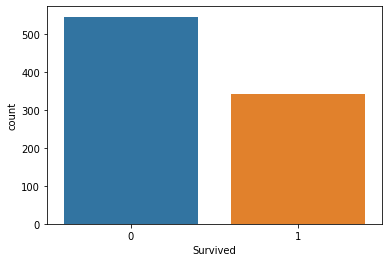

In [5]:
# creating different plot
sns.countplot(x='Survived', data=titanic_data)

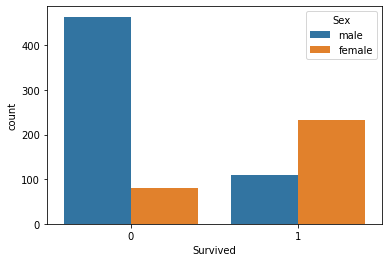

In [10]:
sns.countplot(x='Survived', hue='Sex', data=titanic_data)

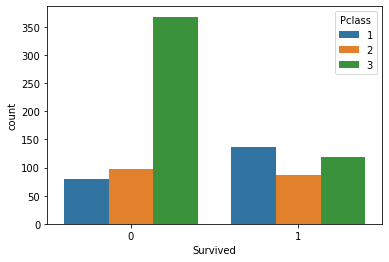

In [11]:
sns.countplot(x='Survived', hue='Pclass', data=titanic_data)

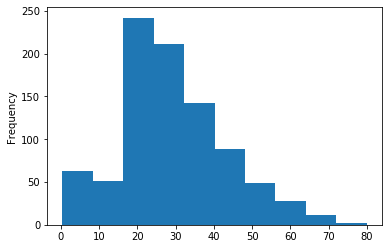

In [12]:
titanic_data['Age'].plot.hist()

## --> Data Wrangling

In [14]:
titanic_data.isnull()


,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False


In [13]:
# cleaning data
print (titanic_data.isnull().sum().sum())


0


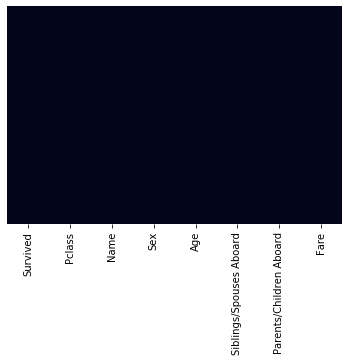

In [19]:
sns.heatmap(titanic_data.isnull(), yticklabels=False, cbar=False)

In [15]:
# no missing values

In [22]:
sex = pd.get_dummies(titanic_data['Sex'], drop_first=True)

In [29]:
pclass = pd.get_dummies(titanic_data['Pclass'], drop_first=True)

In [31]:
titanic_data = pd.concat([titanic_data, sex, pclass], axis=1)

In [32]:
titanic_data.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,male,2,3
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500,1,0,1
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,0,0,0
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250,0,0,1
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000,0,0,0
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500,1,0,1


In [34]:
titanic_data.drop(['Pclass', 'Name', 'Sex'], axis=1, inplace=True)

In [35]:
titanic_data.head()

,Survived,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,male,2,3
0,0,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,1,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,0
4,0,35.0,0,0,8.0500,1,0,1


## --> Build Model

In [36]:
x = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']

In [37]:
 from sklearn.model_selection import train_test_split

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)


In [39]:
 from sklearn.linear_model import LogisticRegression

In [40]:
logmodel = LogisticRegression()

In [41]:
logmodel.fit(x_train, y_train)

/home/computer-myo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
predictions=logmodel.predict(x_test)

In [43]:
# testing performances of the model and calculating the accuracy

In [44]:
 from sklearn.metrics import classification_report

In [46]:
classification_report(y_test, predictions)

'              precision    recall  f1-score   support\n\n           0       0.77      0.86      0.81       102\n           1       0.78      0.66      0.71        76\n\n    accuracy                           0.78       178\n   macro avg       0.78      0.76      0.76       178\nweighted avg       0.78      0.78      0.77       178\n'

In [47]:
 from sklearn.metrics import confusion_matrix

In [48]:
confusion_matrix(y_test, predictions)

array([[88, 14],
       [26, 50]])

In [49]:
 from sklearn.metrics import accuracy_score

In [50]:
accuracy_score(y_test, predictions)

0.7752808988764045

## Accuracy check

In [ ]:
# 0.775 or 78% is quit good